Bibliotecas usadas no projeto

In [2]:
from random import randint
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
import gym
env = gym.make('Taxi-v3').env # Taxi-v3 nos fornece a estrutura inicial do mapa, incluindo suas chaves para as posições

#### Representação do mapa e do trajeto que o táxi terá que fazer, indo do ponto 'rosa' até o ponto 'azul'

In [3]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
# Criando um grafo a partir das posições entregues pelo Taxi-v3

grafo_mapa = {}
grafo_mapa[0] = [20, 100]
grafo_mapa[20] = [0, 120]
grafo_mapa[40] = [60, 140]
grafo_mapa[60] = [40, 80, 160]
grafo_mapa[80] = [60, 180]
grafo_mapa[100] = [0, 120, 200]
grafo_mapa[120] = [20, 100, 220]
grafo_mapa[140] = [40, 160, 240]
grafo_mapa[160] = [60, 140, 180, 260]
grafo_mapa[180] = [80, 160, 280]
grafo_mapa[200] = [100, 220, 300]
grafo_mapa[220] = [200, 120, 240, 320]
grafo_mapa[240] = [220, 140, 260, 340]
grafo_mapa[260] = [240, 160, 280, 360]
grafo_mapa[280] = [260, 180, 380]
grafo_mapa[300] = [200, 400]
grafo_mapa[320] = [220, 340, 420]
grafo_mapa[340] = [240, 320, 440]
grafo_mapa[360] = [260, 380, 460]
grafo_mapa[380] = [280, 360, 480]
grafo_mapa[400] = [300]
grafo_mapa[420] = [320, 440]
grafo_mapa[440] = [340, 420]
grafo_mapa[460] = [360, 480]
grafo_mapa[480] = [380, 460]

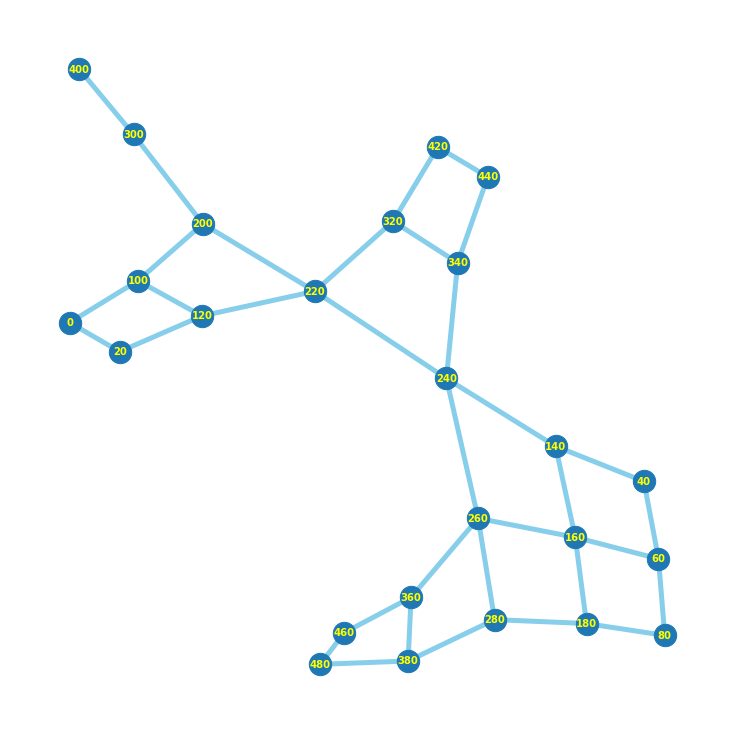

In [5]:
G = nx.Graph(grafo_mapa) # Cria um grafo a partir do dicionário de grafo montado

plt.figure(1,figsize=(10,10)) 
nx.draw(G, with_labels=True, node_size=500, font_size=10, width=5, font_color="yellow", font_weight="bold", edge_color="skyblue", style="solid")
# O grafo gerado pode ser apresentado de forma um pouco confusa, mas não incorreta,
# para uma visualização melhor, basta executar essa célula outras vezes até gerar um grafo mais claro

### Tentativa de movimentação do táxi utilizando o DFS

In [6]:
from collections import defaultdict

# Grafo não direcionado usando lista de adjacências
class Graph:
	def __init__(self):

		# Dicionário padrão para armazenar grafo
		self.graph = defaultdict(list)

	# Adiciona aresta ao grafo
	def adicionaAresta(self, u, v):
		self.graph[u].append(v)
		self.graph[v].append(u)

	# DFS recursivo
	def DFSUtil(self, v, visitados):
		# global achou
		# achou = False
		# Marca o nó da vez como visitado
		# e printa ele
		visitados.add(v)
		print(v, end=' ')

		# if v == fim:
		# 	achou = True
		# 	return

		# Passa por todos os vizinhos do nó
		for vizinho in self.graph[v]:
			if vizinho not in visitados:
				self.DFSUtil(vizinho, visitados)

	def DFS(self, v):

		# set para armazenar os visitados
		visited = set()

		self.DFSUtil(v, visited)

# Criando o grafo
g = Graph()
g.adicionaAresta(0, 20)
g.adicionaAresta(0, 100)
g.adicionaAresta(20, 120)
g.adicionaAresta(40, 60)
g.adicionaAresta(40, 140)
g.adicionaAresta(60, 80)
g.adicionaAresta(60, 160)
g.adicionaAresta(80, 180)
g.adicionaAresta(100, 120)
g.adicionaAresta(100, 200)
g.adicionaAresta(120, 220)
g.adicionaAresta(140, 160)
g.adicionaAresta(140, 240)
g.adicionaAresta(160, 180)
g.adicionaAresta(160, 260)
g.adicionaAresta(180, 280)
g.adicionaAresta(200, 220)
g.adicionaAresta(200, 300)
g.adicionaAresta(220, 240)
g.adicionaAresta(220, 320)
g.adicionaAresta(240, 260)
g.adicionaAresta(240, 340)
g.adicionaAresta(260, 280)
g.adicionaAresta(260, 360)
g.adicionaAresta(280, 380)
g.adicionaAresta(300, 400)
g.adicionaAresta(320, 340)
g.adicionaAresta(320, 420)
g.adicionaAresta(340, 440)
g.adicionaAresta(360, 380)
g.adicionaAresta(360, 460)
g.adicionaAresta(380, 480)
g.adicionaAresta(420, 440)
g.adicionaAresta(460, 480)

g.DFS(0)

0 20 120 100 200 220 240 140 40 60 80 180 160 260 280 380 360 460 480 340 320 420 440 300 400 

<span>Aqui vale uma menção sobre nosso aprendizado: Tentamos encontrar uma forma de usar o DFS para encontrar o menor caminho entre 2 nós no grafo, mas não conseguimos devido ao modo que o DFS realiza a busca no grafo, usando backtracking, ou seja, ele vai até a última camada do grafo (que para o DFS está sendo interpretado como uma árvore) e depois volta essas camadas até um nó não visitado, sem necessariamente "anotar" que caminho de volta foi esse que ele pegou. Com isso fica claro o porquê de não conseguirmos usar o DFS para encontrar o menor caminho entre 2 nós.</span>

### BFS que encontra o menor caminho de um nó até outro

In [7]:
def BFS(grafo, inicio, fim):
    visitado = []
     
    # Fila para percorrer o grafo no BFS
    fila = [[inicio]]
     
    # Loop para percorrer o grafo com a ajuda da fila
    while fila:
        caminho = fila.pop(0)
        no = caminho[-1]
         
        # Condição para verificar se o nó atual não foi visitado
        if no not in visitado:
            vizinhos = grafo[no]
             
            # Loop para iterar sobre os vizinhos do nó
            for vizinho in vizinhos:
                novo_caminho = caminho.copy()
                novo_caminho.append(vizinho)
                fila.append(novo_caminho)
                 
                # Condição para verificar se o nó vizinho é o objetivo
                if vizinho == fim:
                    return novo_caminho # lista que representa o caminho mais rápido do nó inicial ao nó final 
            visitado.append(no)

BFS(grafo_mapa, 0, 340)

[0, 20, 120, 220, 240, 340]

### Renderizando o mapa e fazendo o táxi levar o passageiro até o destino

In [8]:
def print_frames(frames, segundos=0.5):
    """Função responsável por printar cada estado do mapa, fazendo com que o taxi
    se movimente até o passageiro e depois até o destino"""

    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f'Passos dados (Timesteps): {i+1}')
        print(f"Estado: {frame['estado']}")
        sleep(segundos)


def trajeto_taxi(Y_taxi, X_taxi, id_destino, id_passageiro, segundos=0.5):
    """Função responsável por encontrar o caminho que o táxi tem que fazer para ir até
    o passageiro e depois até o destino"""

    # Estado do mapa que é configurado pelo index do passageiro e do destino, quando o taxi está na posição (0,0)
    posicao_pass_dest = env.encode( 0, 0, id_destino, id_passageiro) # linha do taxi | coluna do taxi | index do destino | index do passageiro

    # Remapeando o grafo que representa o mapa real que o táxi tem que percorrer
    grafo_taxi = {k + posicao_pass_dest: [v + posicao_pass_dest for v in grafo_mapa[k]] for k,v in grafo_mapa.items()}

    # Gerando o estado inicial do mapa
    posicao_taxi = env.encode(Y_taxi, X_taxi, id_destino, id_passageiro)

    # Possíveis estados do mapa onde está o passageiro e o destino
    coor = [0, 80, 400, 460]

    # Estado do passageiro e do destino, considerando o configuração real do grafo, que representa o mapa
    coor_passageiro = coor[id_passageiro] + posicao_pass_dest
    coor_destino = coor[id_destino] + posicao_pass_dest

    # Utilizando o BFS, para encontrar o menor caminho entre a posição inicial do táxi e passageiro
    trajeto_passageiro = BFS(grafo_taxi, posicao_taxi, coor_passageiro)

    # Utilizando o BFS, para encontrar o menor caminho entre o passageiro o destino
    trajeto_destino = BFS(grafo_taxi, coor_passageiro, coor_destino)

    frames = []

    for estado in trajeto_passageiro:

        # Variável responsável por guardar no ambiente env o estado atual do mapa
        env.s = estado

        acao = 0

        frames.append({
                'frame': env.render(mode='ansi'), # Renderiza o estado do mapa no formato ansi
                'estado': estado,
                'ação': acao,
            })

    for estado in trajeto_destino:  
        env.s = estado

        acao = 4
        if estado == coor_destino:
            acao = 5

        frames.append({
                'frame': env.render(mode='ansi'), 
                'estado': estado,
                'ação': acao,
            })

    # Representação do ato do táxi pegar o passageiro e levar até o destino
    for i, frame in enumerate(frames):
        if frame['ação'] == 4 or frame['ação'] == 5:
            frame['frame'] = frame['frame'].replace('35', '0').replace('43', '41')
    frame_fim = frames[-1].copy()
    frame_fim['frame'] = frame_fim['frame'].replace('41', '43')
    frames.append(frame_fim)

    print_frames(frames, segundos)

### Aleatorização das variáveis iniciais

In [16]:
xTaxi = randint(0, 4) # Gerando aleatoriamente a posição X do táxi
yTaxi = randint(0, 4) # Gerando aleatoriamente a posição y do táxi

idDestino = randint(0, 3) # Gerando aleatoriamente a posiçao destino

# Gerando aleatoriamente a posição do passageiro, certificando que não seja a mesma do destino
idsDiferentes = False
while not idsDiferentes:
    idPassageiro = randint(0, 3)
    if idPassageiro != idDestino:
        idsDiferentes = True


In [17]:
print(f'Posição inicial do táxi: {xTaxi, yTaxi}')
print(f'ID destino: {idDestino}, (Azul)')
print(f'ID passageiro: {idPassageiro}, (Rosa)')

Posição inicial do táxi: (1, 1)
ID destino: 2, (Azul)
ID passageiro: 3, (Rosa)


In [22]:
trajeto_taxi(yTaxi, xTaxi, idDestino, idPassageiro, 0.5) # Executa o programa

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Passos dados (Timesteps): 1
Estado: 131
